## PI Gas Data 2019
Let's have a look at the data from PI's 2019 gas bills. These can be found in the [Gas Bills folder](https://app.skiff.org/folder/da3cb50e-1434-4f96-b668-a0ce10c447fb) on Skiff.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = {
    "month": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    "volume [m³]": [34925.565, 43653.058, 41489.116, 23167.301, 17464.341, 9887.417, 5441.041, 5054.401, 6756.869, 8817.918, 15771.228, 31018.618]
}
df = pd.DataFrame(data)
df

,month,volume [m³]
0,January,34925.565
1,February,43653.058
2,March,41489.116
3,April,23167.301
4,May,17464.341
5,June,9887.417
6,July,5441.041
7,August,5054.401
8,September,6756.869
9,October,8817.918


To convert to energy, we'll just use the same conversion factor as in the report from 2009: 10.2 kWh/m³. The validity of this factor should be checked / updated.

In [3]:
vol = df["volume [m³]"].values
df = df.assign(energy=10.2*vol)
df.rename(columns = {'energy':'energy [kWh]'}, inplace =True)
df

,month,volume [m³],energy [kWh]
0,January,34925.565,356240.7630
1,February,43653.058,445261.1916
2,March,41489.116,423188.9832
3,April,23167.301,236306.4702
4,May,17464.341,178136.2782
5,June,9887.417,100851.6534
6,July,5441.041,55498.6182
7,August,5054.401,51554.8902
8,September,6756.869,68920.0638
9,October,8817.918,89942.7636


Or as a nice bar chart, just to get a feeling for when we heat most, i.e. in February:

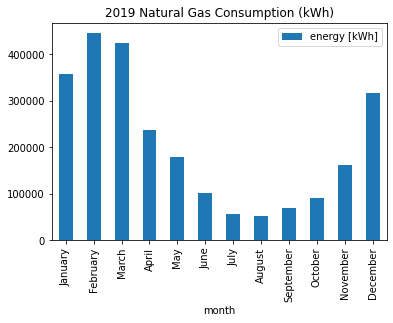

In [4]:
df.plot(x ='month', y='energy [kWh]', kind = 'bar', title = '2019 Natural Gas Consumption (kWh)')
plt.show()

For comparison, see Figure 7 from the [2009 Report](https://app.skiff.org/file/0cc9d06a-68e3-4c86-af61-3e980e9678a4).

The numbers in the 2009 report are given in terms of kWh/day/person, counting only PI residents. (Please correct this, Rob (Spekkens), if mistaken!). Let's make the rough estimate of 200 PI residents. This gives: 

In [5]:
total_energy = df['energy [kWh]'].sum()
total_energy

2483158.1045999993

In [6]:
gas_consumption = total_energy / (365*200)
gas_consumption

34.015864446575335

This is the same number as from the 2009 report: 34 kWh/day/person. Check: Is the conversion factor valid? How many residents did PI have in 2019? 
Discuss: Were the building improvements consumed by increase of number of people? What further improvements were made during the pandemic, i.e. after 2019?